## Flight Ticket Price Prediction (Using Decision Tree and XGboost)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.getcwd())

C:\Users\shirs


In [3]:
os.chdir("C:/Users/shirs/OneDrive/Documents/Jupyter/Flight Prediction")

In [4]:
# Importing the necessary Data sets for EDA
train_df = pd.read_excel("Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_df.shape

(10683, 11)

In [6]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
test_df.shape

(2671, 10)

In [8]:
final_df = pd.concat([train_df, test_df], ignore_index = True)
final_df.shape

(13354, 11)

In [9]:
df_lin = final_df.copy()

In [10]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [12]:
final_df.isnull().sum() # Null values in Price due to test data 

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [13]:
## Feature Engineer Process
### Splitting the Date feature into Date, Month and Year. Indian Format DD/MM/YY as per the Dataset
final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

In [14]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [15]:
final_df[['Date', 'Month', 'Year']] = final_df[['Date', 'Month', 'Year']].astype(int)

In [16]:
final_df.info() # checking the conversion of dtype of date month and year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.3+ MB


In [17]:
final_df.drop('Date_of_Journey', axis = 1, inplace = True)

In [18]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [19]:
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]

In [20]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [21]:
final_df['Arrival_hours'] = final_df['Arrival_Time'].str.split(':').str[0].astype(int)
final_df['Arrival_minutes'] = final_df['Arrival_Time'].str.split(':').str[1].astype(int)

In [22]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [23]:
final_df.drop('Arrival_Time', axis = 1, inplace = True)

In [24]:
final_df['Departure_hours'] = final_df['Dep_Time'].str.split(':').str[0].astype(int)
final_df['Departure_minutes'] = final_df['Dep_Time'].str.split(':').str[1].astype(int)

In [25]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  object 
 1   Source             13354 non-null  object 
 2   Destination        13354 non-null  object 
 3   Route              13353 non-null  object 
 4   Dep_Time           13354 non-null  object 
 5   Duration           13354 non-null  object 
 6   Total_Stops        13353 non-null  object 
 7   Additional_Info    13354 non-null  object 
 8   Price              10683 non-null  float64
 9   Date               13354 non-null  int32  
 10  Month              13354 non-null  int32  
 11  Year               13354 non-null  int32  
 12  Arrival_hours      13354 non-null  int32  
 13  Arrival_minutes    13354 non-null  int32  
 14  Departure_hours    13354 non-null  int32  
 15  Departure_minutes  13354 non-null  int32  
dtypes: float64(1), int32(7

In [27]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
# Updating a missing value in Total_Stops for Delhi to Cochin 
final_df.loc[9039, "Total_Stops"] = '1 stop'
final_df.loc[9039]

Airline              Air India
Source                   Delhi
Destination             Cochin
Route                      NaN
Dep_Time                 09:45
Duration               23h 40m
Total_Stops             1 stop
Additional_Info        No info
Price                   7480.0
Date                         6
Month                        5
Year                      2019
Arrival_hours                9
Arrival_minutes             25
Departure_hours              9
Departure_minutes           45
Name: 9039, dtype: object

In [29]:
final_df.loc[9039]

Airline              Air India
Source                   Delhi
Destination             Cochin
Route                      NaN
Dep_Time                 09:45
Duration               23h 40m
Total_Stops             1 stop
Additional_Info        No info
Price                   7480.0
Date                         6
Month                        5
Year                      2019
Arrival_hours                9
Arrival_minutes             25
Departure_hours              9
Departure_minutes           45
Name: 9039, dtype: object

In [30]:
# Mapping the Total_Stops Objects 
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  object 
 1   Source             13354 non-null  object 
 2   Destination        13354 non-null  object 
 3   Route              13353 non-null  object 
 4   Dep_Time           13354 non-null  object 
 5   Duration           13354 non-null  object 
 6   Total_Stops        13354 non-null  int64  
 7   Additional_Info    13354 non-null  object 
 8   Price              10683 non-null  float64
 9   Date               13354 non-null  int32  
 10  Month              13354 non-null  int32  
 11  Year               13354 non-null  int32  
 12  Arrival_hours      13354 non-null  int32  
 13  Arrival_minutes    13354 non-null  int32  
 14  Departure_hours    13354 non-null  int32  
 15  Departure_minutes  13354 non-null  int32  
dtypes: float64(1), int32(7

In [32]:
final_df.drop('Route', axis = 1, inplace = True)
final_df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,09:25,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [33]:
# Converting the Durations into Minutes
def duration_to_minutes(x):
    hours = 0
    minutes = 0
    if 'h' in x:
        hours = int(x.split('h')[0].strip())
        x = x.split('h')[1]
    if 'm' in x:
        minutes = int(x.replace('m','').strip())
    return hours * 60 + minutes

In [34]:
final_df['Duration_Minutes']= final_df['Duration'].apply(duration_to_minutes)
final_df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_Minutes
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,09:25,19h,2,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,285


In [35]:
# Drop Dep_time, Duration
final_df.drop('Dep_Time', axis = 1, inplace = True)
final_df.drop('Duration', axis = 1, inplace = True)

In [36]:
final_df["Additional_Info"].unique()  # Need fixing 

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [37]:
final_df[final_df["Additional_Info"] == 'No Info']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_Minutes
795,IndiGo,Banglore,New Delhi,1,No Info,8153.0,1,3,2019,21,50,16,55,295
2212,IndiGo,Banglore,New Delhi,1,No Info,7917.0,1,3,2019,20,35,16,15,260
9220,IndiGo,Banglore,New Delhi,1,No Info,8064.0,1,3,2019,10,0,5,15,285


In [38]:
final_df.loc[[795, 2212, 9220], "Additional_Info"] = 'No info'

In [39]:
final_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [40]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,285


In [41]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [42]:
label.fit(final_df["Additional_Info"])
dict(zip(label.classes_, label.transform(label.classes_)))

{'1 Long layover': 0,
 '1 Short layover': 1,
 '2 Long layover': 2,
 'Business class': 3,
 'Change airports': 4,
 'In-flight meal not included': 5,
 'No check-in baggage included': 6,
 'No info': 7,
 'Red-eye flight': 8}

In [43]:
final_df["Additional_Info"] = label.fit_transform(final_df["Additional_Info"])

In [44]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,7,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,7,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,7,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,7,13302.0,1,3,2019,21,35,16,50,285


In [45]:
final_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  object 
 1   Source             13354 non-null  object 
 2   Destination        13354 non-null  object 
 3   Total_Stops        13354 non-null  int64  
 4   Additional_Info    13354 non-null  int32  
 5   Price              10683 non-null  float64
 6   Date               13354 non-null  int32  
 7   Month              13354 non-null  int32  
 8   Year               13354 non-null  int32  
 9   Arrival_hours      13354 non-null  int32  
 10  Arrival_minutes    13354 non-null  int32  
 11  Departure_hours    13354 non-null  int32  
 12  Departure_minutes  13354 non-null  int32  
 13  Duration_Minutes   13354 non-null  int64  
dtypes: float64(1), int32(8), int64(2), object(3)
memory usage: 1.0+ MB


In [47]:
for col in ["Airline", "Source", "Destination"]:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col])

In [48]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_Minutes
0,3,0,5,0,7,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2,7,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2,7,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1,7,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1,7,13302.0,1,3,2019,21,35,16,50,285


In [49]:
final_df["Flight_Date"] = pd.to_datetime({'year': final_df['Year'],
                                         'month': final_df['Month'],
                                         'day': final_df['Date']})

In [50]:
final_df["DayOfWeek"] = final_df["Flight_Date"].dt.dayofweek

In [51]:
final_df["Isweekend"] = (final_df["DayOfWeek"] >=5).astype(int)

In [52]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_Minutes,Flight_Date,DayOfWeek,Isweekend
0,3,0,5,0,7,3897.0,24,3,2019,1,10,22,20,170,2019-03-24,6,1
1,1,3,0,2,7,7662.0,1,5,2019,13,15,5,50,445,2019-05-01,2,0
2,4,2,1,2,7,13882.0,9,6,2019,4,25,9,25,1140,2019-06-09,6,1
3,3,3,0,1,7,6218.0,12,5,2019,23,30,18,5,325,2019-05-12,6,1
4,3,0,5,1,7,13302.0,1,3,2019,21,35,16,50,285,2019-03-01,4,0


In [53]:
final_df.drop(["Flight_Date", "Date", "Year"], axis = 1, inplace = True)

In [54]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_Minutes,DayOfWeek,Isweekend
0,3,0,5,0,7,3897.0,3,1,10,22,20,170,6,1
1,1,3,0,2,7,7662.0,5,13,15,5,50,445,2,0
2,4,2,1,2,7,13882.0,6,4,25,9,25,1140,6,1
3,3,3,0,1,7,6218.0,5,23,30,18,5,325,6,1
4,3,0,5,1,7,13302.0,3,21,35,16,50,285,4,0


In [55]:
# Time of day bin
def time_of_day(hour):
    if 5<= hour < 12: return 0 # Morning
    elif 12 <= hour < 17 : return 1 # Afternoon
    elif 17 <= hour < 22 : return 2 # Evening
    else: return 3 # Night

In [56]:
final_df["Departure time of day"] = final_df["Departure_hours"].apply(time_of_day)
final_df["Arrival time of day"] = final_df["Arrival_hours"].apply(time_of_day)
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_Minutes,DayOfWeek,Isweekend,Departure time of day,Arrival time of day
0,3,0,5,0,7,3897.0,3,1,10,22,20,170,6,1,3,3
1,1,3,0,2,7,7662.0,5,13,15,5,50,445,2,0,0,1
2,4,2,1,2,7,13882.0,6,4,25,9,25,1140,6,1,0,3
3,3,3,0,1,7,6218.0,5,23,30,18,5,325,6,1,2,3
4,3,0,5,1,7,13302.0,3,21,35,16,50,285,4,0,1,2


In [57]:
final_df.drop(["Arrival_hours", "Arrival_minutes", "Departure_hours", "Departure_minutes"], axis = 1, inplace = True)
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Duration_Minutes,DayOfWeek,Isweekend,Departure time of day,Arrival time of day
0,3,0,5,0,7,3897.0,3,170,6,1,3,3
1,1,3,0,2,7,7662.0,5,445,2,0,0,1
2,4,2,1,2,7,13882.0,6,1140,6,1,0,3
3,3,3,0,1,7,6218.0,5,325,6,1,2,3
4,3,0,5,1,7,13302.0,3,285,4,0,1,2


In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                13354 non-null  int32  
 1   Source                 13354 non-null  int32  
 2   Destination            13354 non-null  int32  
 3   Total_Stops            13354 non-null  int64  
 4   Additional_Info        13354 non-null  int32  
 5   Price                  10683 non-null  float64
 6   Month                  13354 non-null  int32  
 7   Duration_Minutes       13354 non-null  int64  
 8   DayOfWeek              13354 non-null  int32  
 9   Isweekend              13354 non-null  int32  
 10  Departure time of day  13354 non-null  int64  
 11  Arrival time of day    13354 non-null  int64  
dtypes: float64(1), int32(7), int64(4)
memory usage: 886.9 KB


In [59]:
df_test = final_df[final_df["Price"].isnull()]
df_train = final_df[final_df["Price"].notnull()]

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2671 entries, 10683 to 13353
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                2671 non-null   int32  
 1   Source                 2671 non-null   int32  
 2   Destination            2671 non-null   int32  
 3   Total_Stops            2671 non-null   int64  
 4   Additional_Info        2671 non-null   int32  
 5   Price                  0 non-null      float64
 6   Month                  2671 non-null   int32  
 7   Duration_Minutes       2671 non-null   int64  
 8   DayOfWeek              2671 non-null   int32  
 9   Isweekend              2671 non-null   int32  
 10  Departure time of day  2671 non-null   int64  
 11  Arrival time of day    2671 non-null   int64  
dtypes: float64(1), int32(7), int64(4)
memory usage: 198.2 KB


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                10683 non-null  int32  
 1   Source                 10683 non-null  int32  
 2   Destination            10683 non-null  int32  
 3   Total_Stops            10683 non-null  int64  
 4   Additional_Info        10683 non-null  int32  
 5   Price                  10683 non-null  float64
 6   Month                  10683 non-null  int32  
 7   Duration_Minutes       10683 non-null  int64  
 8   DayOfWeek              10683 non-null  int32  
 9   Isweekend              10683 non-null  int32  
 10  Departure time of day  10683 non-null  int64  
 11  Arrival time of day    10683 non-null  int64  
dtypes: float64(1), int32(7), int64(4)
memory usage: 792.9 KB


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                10683 non-null  int32  
 1   Source                 10683 non-null  int32  
 2   Destination            10683 non-null  int32  
 3   Total_Stops            10683 non-null  int64  
 4   Additional_Info        10683 non-null  int32  
 5   Price                  10683 non-null  float64
 6   Month                  10683 non-null  int32  
 7   Duration_Minutes       10683 non-null  int64  
 8   DayOfWeek              10683 non-null  int32  
 9   Isweekend              10683 non-null  int32  
 10  Departure time of day  10683 non-null  int64  
 11  Arrival time of day    10683 non-null  int64  
dtypes: float64(1), int32(7), int64(4)
memory usage: 792.9 KB


In [63]:
# Drop the "Price" column but don't use inplace=True will effect the original DF
x_train = df_train.drop(["Price"], axis=1)  # Returns a new DataFrame without "Price"
y_train = df_train["Price"]  # Original df_train still has "Price" column

# Same for test data
x_test = df_test.drop(["Price"], axis=1)  # Returns a new DataFrame without "Price"

In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Airline                10683 non-null  int32
 1   Source                 10683 non-null  int32
 2   Destination            10683 non-null  int32
 3   Total_Stops            10683 non-null  int64
 4   Additional_Info        10683 non-null  int32
 5   Month                  10683 non-null  int32
 6   Duration_Minutes       10683 non-null  int64
 7   DayOfWeek              10683 non-null  int32
 8   Isweekend              10683 non-null  int32
 9   Departure time of day  10683 non-null  int64
 10  Arrival time of day    10683 non-null  int64
dtypes: int32(7), int64(4)
memory usage: 709.4 KB


In [65]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 10683 entries, 0 to 10682
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
10683 non-null  float64
dtypes: float64(1)
memory usage: 166.9 KB


In [66]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2671 entries, 10683 to 13353
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Airline                2671 non-null   int32
 1   Source                 2671 non-null   int32
 2   Destination            2671 non-null   int32
 3   Total_Stops            2671 non-null   int64
 4   Additional_Info        2671 non-null   int32
 5   Month                  2671 non-null   int32
 6   Duration_Minutes       2671 non-null   int64
 7   DayOfWeek              2671 non-null   int32
 8   Isweekend              2671 non-null   int32
 9   Departure time of day  2671 non-null   int64
 10  Arrival time of day    2671 non-null   int64
dtypes: int32(7), int64(4)
memory usage: 177.4 KB


In [73]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, 
                              random_state=42,
                              max_depth=15,
                              min_samples_split=10,
                              min_samples_leaf=5,
                              n_jobs=-1
                             )

In [74]:
from sklearn.model_selection import train_test_split
x_train, X_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

In [75]:
# checking the train data for accuracy before Predicting with test dataset
model.fit(x_train, y_train)
print("Train R²:", model.score(x_train, y_train))
print("Valid R²:", model.score(X_valid, y_valid))

Train R²: 0.8510416018813576
Valid R²: 0.7766617738959511


In [90]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
    )
xgb_model.fit(x_train, y_train)
print("XGB Valid R²:", xgb_model.score(X_valid, y_valid))

XGB Valid R²: 0.7963228365676369


In [86]:
# Cross Validation
from xgboost import cv, DMatrix
import xgboost as xgb

dtrain = DMatrix(x_train, label = y_train)
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.1,
    "max_depth": 7,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}
cv_results = xgb.cv(params, dtrain, num_boost_round=500, nfold=5, metrics="rmse", early_stopping_rounds=20)
print(cv_results.tail())

# Improvement Start plateauing around 150 to 155, we could definitely change the parameter n_estimator to 150 to save some execution time.

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
151      1137.492536        6.886722     1967.626820      88.996714
152      1134.896783        6.885734     1968.290810      88.754536
153      1132.567929        7.266925     1967.051782      90.126183
154      1131.188679        7.234490     1967.108221      89.754034
155      1128.890905        6.866084     1966.084431      89.708479


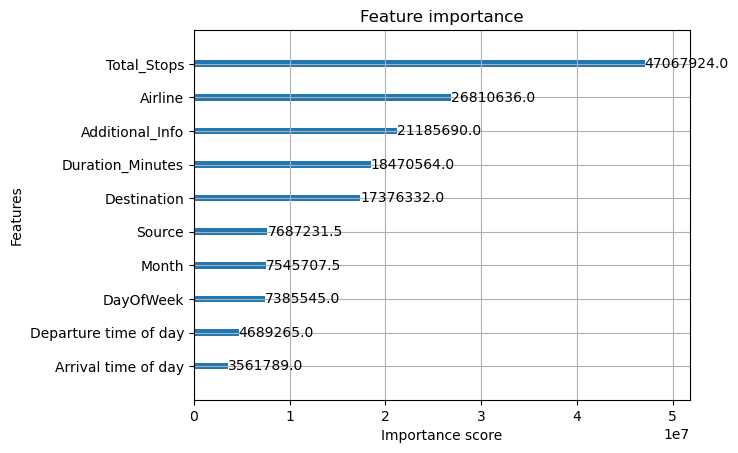

In [91]:
# Feature Importance plot
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot top 10 important features
plot_importance(xgb_model, importance_type="gain", max_num_features=10)
plt.show()

In [93]:
# Predicting the Price of x_test data now
y_pred_test = xgb_model.predict(x_test)

# Add predicted price in test data set
df_test["Predicted Price"] = y_pred_test

df_test.head(20)

C:\Users\shirs\AppData\Local\Temp\ipykernel_28128\1066720202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Predicted Price"] = y_pred_test


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Duration_Minutes,DayOfWeek,Isweekend,Departure time of day,Arrival time of day,Predicted Price
10683,4,2,1,1,7,NaN,6,655,3,0,2,3,14651.727539
10684,3,3,0,1,7,NaN,5,240,6,1,0,0,4640.086426
10685,4,2,1,1,5,NaN,5,1425,1,0,2,2,13088.250977
10686,6,2,1,1,7,NaN,5,780,1,0,0,2,12160.015625
10687,0,0,2,0,7,NaN,6,170,0,0,3,3,6106.161133
10688,4,2,1,1,5,NaN,6,1100,2,0,2,1,10110.569336
10689,1,0,5,1,7,NaN,3,905,1,0,0,3,14445.455078
10690,3,3,0,1,7,NaN,5,315,2,0,1,2,6212.622070
10691,3,3,0,0,7,NaN,3,165,4,0,0,1,4135.558105
10692,4,3,0,1,7,NaN,5,365,5,1,1,3,14596.496094
